In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
#loading the housing data into dataframe

df = pd.read_csv("housingg.csv",header=None, delim_whitespace=True) 

In [3]:
#check the head of the data

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#creating a list of the column names

column_names = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','LSTAT','MEDV']

In [5]:
#assigning column names to the data columns
df.columns =  column_names = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','LSTAT','MEDV']

In [6]:
#checking the head again to confirm column names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
#check data information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
#check for null values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
#check for the shape of datset

df.shape

(506, 14)

In [10]:
#Assigning column price which is the target to Median value of owner-occupied homes in $1000s 

df['Price'] = df.MEDV

In [11]:
#dropping the median value column

df = df.drop('MEDV', axis =1)
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [12]:
#check the description of the data

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
#check for corelation among columns in the dataframe

corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [14]:
#check shape of correlation

corr.shape

(14, 14)

<AxesSubplot:>

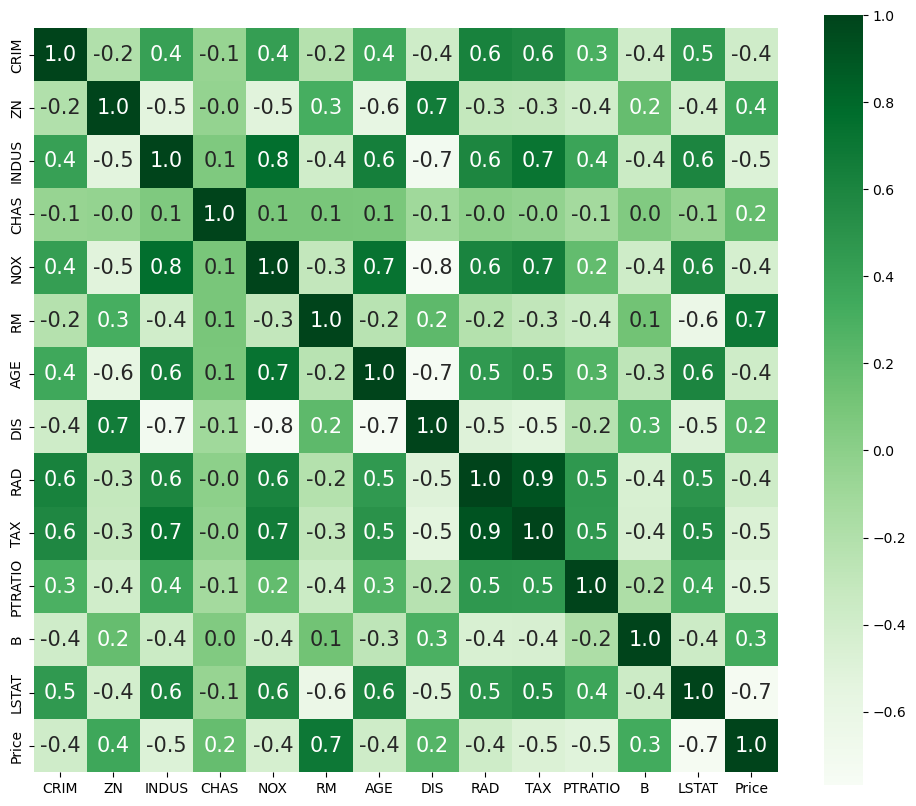

In [15]:
#plot a heatmap to visualize the correlation 

plt.figure(figsize=(12,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [16]:
#assigning the independent and target variable

X = df.drop(['Price'], axis = 1)
y = df.Price

In [17]:
#Splitting to testing and training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=4)

In [18]:
#printing shape of test and train data

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [19]:
# Training the model




In [20]:
#importing linear regression model

from sklearn.linear_model import LinearRegression

#assigning a linear regressor

lm = LinearRegression()

#training the model using training sets

lm.fit(X_train, y_train)

LinearRegression()

In [21]:
#value of intercept

intercept = lm.intercept_
intercept

36.357041376594964

In [22]:
#value of slope

slope = lm.coef_
slope

array([-1.22569795e-01,  5.56776996e-02, -8.83428230e-03,  4.69344849e+00,
       -1.44357828e+01,  3.28008033e+00, -3.44778157e-03, -1.55214419e+00,
        3.26249618e-01, -1.40665500e-02, -8.03274915e-01,  9.35368715e-03,
       -5.23477529e-01])

In [23]:
#evaluation of model using linear regression



In [24]:
#model prediction on train data

y_pred = lm.predict(X_train)
y_pred

array([24.52247959, 15.19750953, 25.5772058 , 13.93939959, 39.46651291,
       17.45959949, 39.71029914, 16.51748069, 20.19733317, 40.7977555 ,
       33.57245034, 14.50420619, 11.44514488, 23.06563951, 24.39734404,
       25.01096096, 14.36116466, 28.28341539, 25.04931481, 22.42825155,
       21.81588517, 18.85208726, 13.3562124 , 13.65792701, 23.64766018,
       18.06876331, 16.12957228, 41.12414874, 19.43391814, 13.17980896,
       12.88401778, 24.48360463, 24.47855835, 22.1443201 , 23.67882714,
       16.25760322, 18.73996794,  6.65661308, 13.32321855, 15.97333187,
       18.13637439, 20.60454402, 30.72884443,  7.75848746, 13.9207036 ,
       -3.80684116, 30.22337446,  9.24045737, 11.75825936, 25.0286616 ,
       18.84078418, 11.88476435, 28.69569373, 23.23374551, 28.59506092,
       20.30414612, 20.27099511, 25.21759304, 29.00813278, 17.29931495,
       10.61483731, 28.61476335, 28.34559327, 30.02547802, 17.11529423,
       20.57024793, 18.28474144, 13.03972891, 23.08527124, 22.90

In [25]:
#model evaluation



In [26]:
#mean square error value of train data

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred)
print (f'MSE is {mse}')

MSE is 19.07368870346903


In [27]:
#R^2 score value of train data

r2 = metrics.r2_score(y_train, y_pred)
print(f'R^2 is {r2}')

R^2 is 0.7465991966746854


In [28]:
#root mean square error of train data

rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
print (f'RMSE is {rmse}')

RMSE is 4.367343437774162


In [29]:
#model prediction on test data

y_pred_test = lm.predict(X_test)
y_pred_test

array([11.07380893, 26.47910329, 17.34489869, 19.1948608 , 36.36170735,
       24.77095832, 31.00051311, 19.94226881, 19.22375105, 24.42998435,
       28.31512637, 28.40796034, 19.27427968, 33.82295207, 21.28596487,
       15.11171444, 20.97688767, 11.28556596, 11.8611348 , 13.88444387,
        5.37422679, 17.55278177, 20.58171204, 22.59849951, 16.07544265,
       20.45924503, 19.1068775 , 14.37832191, 21.23235601, 17.52186564,
       14.40725559, 23.68483414, 33.7410661 , 22.02733357, 17.62139147,
       19.97241153, 30.24069397, 34.69718954, 23.85821534, 24.30715093,
       36.13378112, 31.97532293, 19.626175  , 31.61097971, 34.58127809,
       25.62718797, 39.95041812, 17.60880538, 19.90319708, 23.40417501,
       33.70182396, 25.62491083, 18.25559302, 27.27317174, 13.46377871,
       23.43470656, 24.43721849, 33.52056736, 16.99896935, 37.94464404,
       15.94567818, 19.32528916, 31.84088262, 15.25081303, 38.40344789,
       27.45372884, 34.36154312,  9.37353936, 19.42580066, 21.99

In [30]:
#R^2 score value of test data

r2 = metrics.r2_score(y_test, y_pred_test)
print(f'R^2 is {r2}')

R^2 is 0.7121818377409183


In [31]:
#mean square error value of test data

mse = mean_squared_error(y_test, y_pred_test)
print (f'MSE is {mse}')

MSE is 30.053993307124266


In [32]:
#root mean square error value of test data

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print (f'RMSE is {rmse}')

RMSE is 5.482152251362987


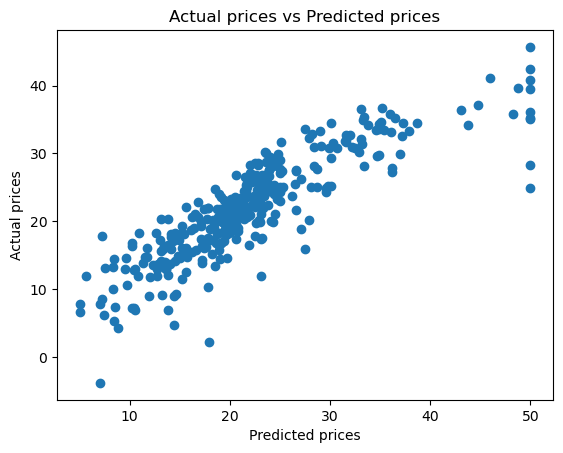

In [33]:
#visualizing the differences between actual prices and predicted prices

plt.scatter(y_train,y_pred)
plt.title("Actual prices vs Predicted prices")
plt.xlabel("Predicted prices")
plt.ylabel("Actual prices")
plt.show()

/Users/adebayosakiru/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


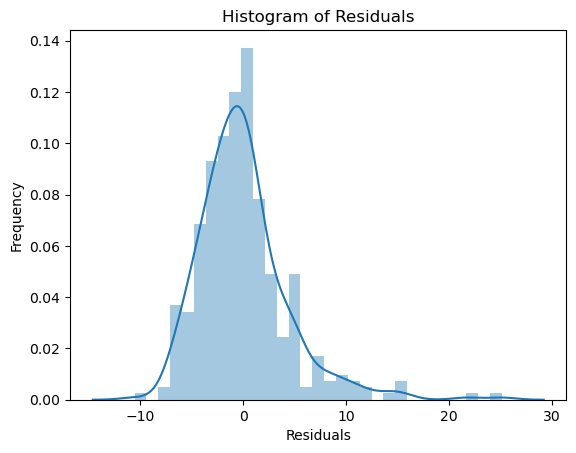

In [34]:
#distribution plot to check for normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [35]:

#evaluation of model using support vector machine

In [36]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [37]:
#training the model using training sets
reg = svm.SVR()
reg.fit(X_train, y_train)

SVR()

In [38]:
y_pred = reg.predict(X_train)
y_pred

array([23.86494587, 19.91150003, 21.79984564, 15.53703846, 34.02546519,
       19.73274461, 32.59747715, 15.05468902, 21.60482169, 25.19238108,
       31.48859251, 13.08228021, 16.41729745, 21.64028355, 23.76190034,
       23.77252256, 18.59385973, 22.01383969, 22.88860472, 20.13662466,
       20.64184005, 17.09053974, 16.90642061, 15.33794008, 24.16241418,
       14.28372759, 17.65782368, 27.48317144, 20.10211034, 13.68149878,
       19.46967903, 22.23091192, 23.26439445, 20.13515571, 23.66286943,
       17.50018909, 16.54403764, 11.89917835, 12.14399337, 20.76080675,
       18.18637823, 21.11277622, 29.23114073, 17.56937427, 12.376143  ,
       16.46012426, 27.23678311, 16.75508625, 11.35753045, 24.48843701,
       18.19126147, 10.87392193, 25.61938169, 22.1395693 , 24.69142731,
       18.30433557, 16.29196466, 24.21367071, 24.90000428, 15.57141036,
       11.77427961, 23.41515601, 26.654883  , 28.54717974, 14.20061989,
       18.59325751, 19.41360915, 16.63762815, 22.4242584 , 20.84

In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred)
print (f'MSE is {mse}')

MSE is 26.953752101332935


In [40]:
#R^2 score value of train data

r2 = metrics.r2_score(y_train, y_pred)
print(f'R^2 is {r2}')

R^2 is 0.6419097248941195


In [41]:
#model prediction on test data

y_pred_test = reg.predict(X_test)
y_pred_test 

array([17.13744078, 25.18466352, 18.63978868, 20.43272156, 32.99401666,
       24.3694027 , 27.20056758, 18.23899617, 14.24415909, 20.84653662,
       28.07714969, 25.94142087, 18.97279015, 23.44424671, 21.14298351,
       13.61443085, 20.76164011, 11.67848481, 12.52830214, 15.56816082,
       19.46706841, 18.58983602, 18.89095506, 20.33876527, 19.58785022,
       18.87106753, 20.29297789, 15.85996192, 16.64678105, 16.59551664,
       12.69147532, 22.38750427, 31.09507004, 20.35774179, 15.38096301,
       15.61798146, 29.97740959, 32.11682922, 22.79328637, 23.03693666,
       30.23345558, 27.78447173, 15.73316187, 28.14054531, 25.52232373,
       21.60546556, 31.3792258 , 18.16072416, 18.35941228, 22.93583205,
       27.58232351, 23.84874813, 14.4350854 , 26.27679629, 15.41096467,
       21.26084851, 23.08609615, 30.04298105, 18.75437799, 26.57897337,
       16.94453116, 17.52588413, 27.94003283, 18.47120803, 33.83922295,
       25.49879347, 23.45226065, 12.29802528, 18.66535685, 22.13

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_test)
print (f'MSE is {mse}')


MSE is 42.81057499010247


In [43]:
r2 = metrics.r2_score(y_test, y_pred_test)
print(f'R^2 is {r2}')

R^2 is 0.5900158460478174
